# 카메라 스티커 앱 만들기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

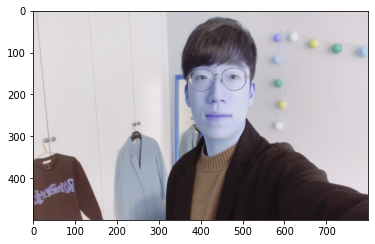

In [2]:
import os

my_image_path = 'ex7image.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (800, 500))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

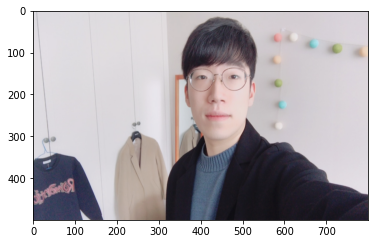

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()

In [5]:
dlib_rects = detector_hog(img_rgb, 1)

In [6]:
print(dlib_rects)

rectangles[[(345, 118) (531, 304)]]


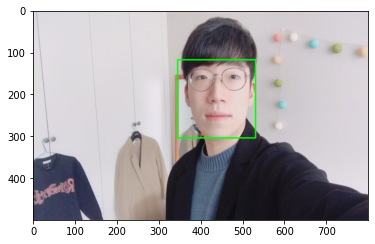

In [7]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [12]:
!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

--2023-04-17 02:05:55--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2023-04-17 02:05:55--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.1’

shape_predictor_68_ 100%[===================>]  95.08M   129MB/s    in 0.7s    

2023-04-17 02:05:59 

In [14]:
model_path = r"shape_predictor_68_face_landmarks.dat.1"
landmark_predictor = dlib.shape_predictor(model_path)
print("^ㅅ^")

^ㅅ^


In [15]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


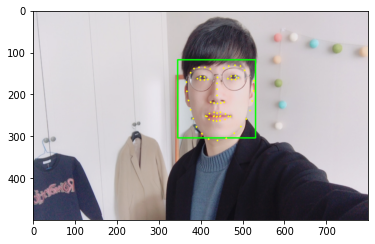

In [16]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [17]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print("(x, y) : ({}, {})".format(x, y))
    print("(w, h) : ({}, {})".format(w, h))

(440, 222)
(x, y) : (439, 203)
(w, h) : (187, 187)


In [20]:
sticker_path = '24674.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(187, 187, 3)


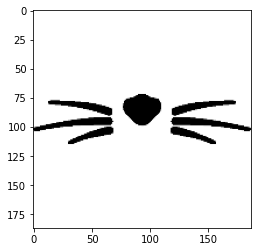

In [21]:
plt.imshow(img_sticker)

In [22]:
refined_x = x - int(w/2) 
refined_y = y - int(h/2) 
print("(x, y) : ({}, {})".format(refined_x, refined_y))

(x, y) : (346, 110)


In [23]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

(187, 187, 3)


In [24]:
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

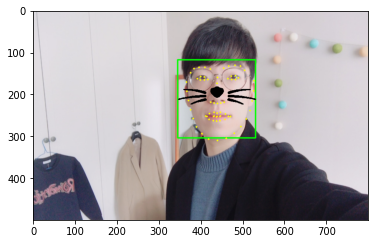

In [25]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

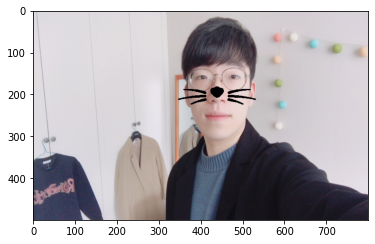

In [26]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


# 문제점 분석  
1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?  
- 해당 각도에 따라 이동 해야한다. 변환을 해야한다 기하변환이 필요할 것으로 생각됩니다.  

2. 멀리서 촬영하면 왜 안될까요?
- 멀리서 촬영할 경우는 얼굴의 특징점을 찾기 어려워서 

3. 실행 속도가 중요할까요?
- 중요하다. 실제 서비스에서 느리게 적용할 경우 사용자의 피로도를 증가시킬 수 있기 때문에

4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
- 정확한 특정 위치를 맞출 필요는 없지만 적어도 어느 정도의 오차 범위의 정확도가 필요할 거 같다.